# WeatherPy

### Important Trends to Note:


<p>1. The temperature of cities is directly proportional to the latitude, with the highest temperatures occuring as we approach the equator, and going back down as we move away from it.  </p>
<p>2. The level of cloudiness in every city seems to vary evenly across latitudes, meaning that proximity to the equator does not affect its cloudiness, and we see an evenly distributed range of different cloudiness levels at every latitude.  </p>
<p>3. The humidity across cities does not seem to be related to latitude, and is instead mostly above 60% for most cities, regardless of latitude.  </p>


In [153]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
from citipy import citipy
import numpy as np
import os
import random
import datetime as dt 

date = dt.date.today
date = dt.datetime.today().strftime("%m/%d/%Y")


### Getting List of Cities from Citipy Module, Across Latitudes and Longitudes

In [123]:
# go through all coordinates
lat = range(-90,90)
lon = range(-180,180)

lats = []
lons = []
cities = []
city_list = []

for x in lat:
    for y in lon:
        name = (citipy.nearest_city(x,y)).city_name
        if name not in cities:
            cities.append(name)
            lats.append(x)
            lons.append(y)

df_9 = pd.DataFrame()
df_9["City"] = cities
df_9["Latitude"] = lats
df_9["Longitude"] = lons

### Pulling Uniformly Distributed Sample

In [124]:
df_1 = df_9

list = [-60,-45,-30,-15,0,15,30,45,60,75]
final_sample = pd.DataFrame()
size = 80
for x in list:
    try:
        sample_df = df_1[(df_1['Latitude'] > x) & (df_1['Latitude'] < (x+15))].sample(n=size)
        final_sample = pd.concat([final_sample,sample_df])
        sample_df = pd.DataFrame()
    except ValueError:
        'Sample too small'
        sample_df = df_1[(df_1['Latitude'] > x) & (df_1['Latitude'] < (x+15))]
        if len(sample_df) > 0:
            sample_df = sample_df.sample(len(sample_df))
            final_sample = pd.concat([final_sample,sample_df])
            
        sample_df = pd.DataFrame()
    except ValueError:
        "Ignore"
    

final_sample.head()
print( "Sample size = " + str(len(final_sample)))


Sample size = 667


In [125]:
df_1.head()

,City,Latitude,Longitude
0,vaini,-90,-180
1,mataura,-90,-168
2,rikitea,-90,-141
3,punta arenas,-90,-127
4,ushuaia,-90,-92


### Generate Cities List

In [126]:
sample_cities = final_sample["City"]
sample_cities.head()

48         waitati
49         wyndham
51         lincoln
40    port lincoln
55         otautau
Name: City, dtype: object

### Perform API Calls From OpenWeaterData

In [127]:
url = 'http://api.openweathermap.org/data/2.5/weather'
api_key = 'd75d560ad688bb50a578b5fe3feab686'

params = {'appid': api_key,
          'q': '',
          'units': 'imperial'}

weather_data = []
cities = []
counter = 1
# Loop through the list of cities and perform a request for data on each
for city in sample_cities:
    # Get weather data
    try:
        city1 = city.replace(" ", "%20")
        params['q'] = city1
        url_used = url + '?appid=' + api_key + '&units=' + 'imperial' '&q=' + city1
        response = req.get(url, params=params).json()
        weather_data.append(response)
        print("Processing weather information for no." + str(counter) + ": " + city + '\n' + url_used)
        counter += 1
    except KeyError:
        "Not available"
    except AttributeError:
        "Ignore"
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Processing weather information for no.1: waitati
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=waitati
Processing weather information for no.2: wyndham
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=wyndham
Processing weather information for no.3: lincoln
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=lincoln
Processing weather information for no.4: port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=port%20lincoln
Processing weather information for no.5: otautau
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=otautau
Processing weather information for no.6: plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=plettenberg%20bay
Processing

Processing weather information for no.51: bombay
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=bombay
Processing weather information for no.52: beloha
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=beloha
Processing weather information for no.53: villa maria
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=villa%20maria
Processing weather information for no.54: stellenbosch
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=stellenbosch
Processing weather information for no.55: ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=ngunguru
Processing weather information for no.56: imbituba
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=imbituba
Processing wea

Processing weather information for no.101: masterton
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=masterton
Processing weather information for no.102: melo
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=melo
Processing weather information for no.103: perth
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=perth
Processing weather information for no.104: azul
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=azul
Processing weather information for no.105: cooma
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=cooma
Processing weather information for no.106: matata
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=matata
Processing weather information for no.107: hok

Processing weather information for no.151: marica
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=marica
Processing weather information for no.152: nsoko
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=nsoko
Processing weather information for no.153: piet retief
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=piet%20retief
Processing weather information for no.154: kimberley
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=kimberley
Processing weather information for no.155: sinazongwe
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sinazongwe
Processing weather information for no.156: pocone
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=pocone
Processing weath

Processing weather information for no.201: trairi
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=trairi
Processing weather information for no.202: mweka
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=mweka
Processing weather information for no.203: chinsali
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=chinsali
Processing weather information for no.204: mpanda
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=mpanda
Processing weather information for no.205: muncar
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=muncar
Processing weather information for no.206: sayan
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sayan
Processing weather information for no.20

Processing weather information for no.252: cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=cabedelo
Processing weather information for no.253: coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=coahuayana
Processing weather information for no.254: loubomo
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=loubomo
Processing weather information for no.255: touros
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=touros
Processing weather information for no.256: chirongui
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=chirongui
Processing weather information for no.257: ewo
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=ewo
Processing weather informa

http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=gusau
Processing weather information for no.304: mao
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=mao
Processing weather information for no.305: san juan de uraba
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=san%20juan%20de%20uraba
Processing weather information for no.306: metehara
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=metehara
Processing weather information for no.307: sangueya
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sangueya
Processing weather information for no.308: gaya
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=gaya
Processing weather information for no.309: weligama
http://api.op

Processing weather information for no.354: suez
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=suez
Processing weather information for no.355: sheoganj
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sheoganj
Processing weather information for no.356: vega de alatorre
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=vega%20de%20alatorre
Processing weather information for no.357: khatima
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=khatima
Processing weather information for no.358: sidhi
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sidhi
Processing weather information for no.359: susner
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=susner
Processing weath

Processing weather information for no.404: barpeta
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=barpeta
Processing weather information for no.405: apaxtla
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=apaxtla
Processing weather information for no.406: cao bang
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=cao%20bang
Processing weather information for no.407: bheramara
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=bheramara
Processing weather information for no.408: ayutla
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=ayutla
Processing weather information for no.409: manama
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=manama
Processing weather infor

Processing weather information for no.454: timizart
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=timizart
Processing weather information for no.455: cabot
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=cabot
Processing weather information for no.456: rosetta
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=rosetta
Processing weather information for no.457: kant
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=kant
Processing weather information for no.458: almeria
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=almeria
Processing weather information for no.459: gainesville
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=gainesville
Processing weather informati

Processing weather information for no.504: rock hill
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=rock%20hill
Processing weather information for no.505: cody
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=cody
Processing weather information for no.506: alanya
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=alanya
Processing weather information for no.507: sikea
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=sikea
Processing weather information for no.508: bantry
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=bantry
Processing weather information for no.509: buncrana
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=buncrana
Processing weather information for

Processing weather information for no.554: dno
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=dno
Processing weather information for no.555: baijiantan
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=baijiantan
Processing weather information for no.556: vetluga
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=vetluga
Processing weather information for no.557: xinqing
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=xinqing
Processing weather information for no.558: gizycko
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=gizycko
Processing weather information for no.559: abay
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=abay
Processing weather information for n

Processing weather information for no.604: skibotn
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=skibotn
Processing weather information for no.605: arkhangelsk
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=arkhangelsk
Processing weather information for no.606: kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=kamenskoye
Processing weather information for no.607: khonuu
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=khonuu
Processing weather information for no.608: hof
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=hof
Processing weather information for no.609: skjervoy
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=skjervoy
Processing weather inf

Processing weather information for no.654: karamken
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=karamken
Processing weather information for no.655: udimskiy
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=udimskiy
Processing weather information for no.656: ylivieska
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=ylivieska
Processing weather information for no.657: blagoyevo
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=blagoyevo
Processing weather information for no.658: narsaq
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=narsaq
Processing weather information for no.659: batagay
http://api.openweathermap.org/data/2.5/weather?appid=d75d560ad688bb50a578b5fe3feab686&units=imperial&q=batagay
Processing weather

### Creating a DataFrame with Api Data

In [128]:
latitude_data = []
longitude_data = []
cloudiness_data = []
temp_data = []
humidity_data = []
windspeed_data = []
country_data = []

for data in weather_data:
    try:
        latitude_data.append(data['coord']['lat'])
        longitude_data.append(data['coord']['lon'])
        country_data.append(data['sys']['country'])
        cloudiness_data.append(data['clouds']['all'])
        temp_data.append(data['main']['temp'])
        humidity_data.append(data['main']['humidity'])
        windspeed_data.append(data['wind']['speed'])
        cities.append(data['name'])

    except KeyError:
        "Not available"
        
        
weather_dict = {'City': cities, 'Latitude': latitude_data, 'Longitude': longitude_data, 
                'Cloudiness': cloudiness_data, 'Temperature': temp_data, 'Humidity': humidity_data,
                'Country': country_data, 'Wind Speed': windspeed_data}
weather_data_df = pd.DataFrame(weather_dict)
print(weather_data_df.head())
len(weather_data_df)

        City  Cloudiness Country  Humidity  Latitude  Longitude  Temperature  \
0    Waitati           0      NZ        37    -45.75     170.57        74.53   
1    Wyndham           1      US       100     37.70     -77.61        32.86   
2    Lincoln           1      US        82     40.80     -96.67        57.96   
3    Otautau          92      NZ        61    -46.15     168.00        67.51   
4  Jamestown           1      US        92     42.10     -79.24        27.68   

   Wind Speed  
0        3.24  
1        2.62  
2       10.29  
3       16.82  
4        3.36  


511

In [129]:
weather_data_df.to_csv("WeatherPy.csv")

### Latitude vs Temperature Plot

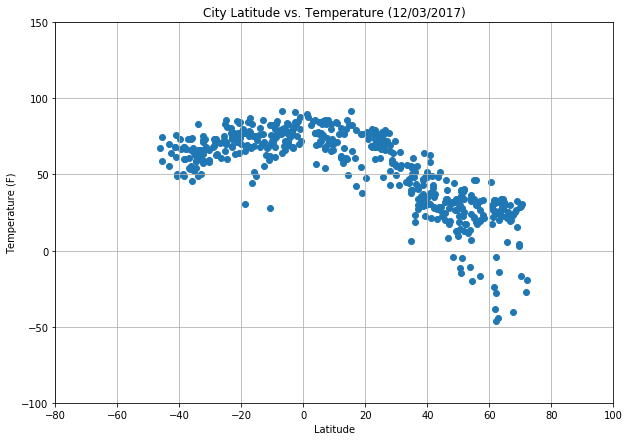

In [158]:
plt.figure(figsize=(10,7))
plt.scatter(weather_data_df['Latitude'], weather_data_df['Temperature'], marker='o')
# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature ('+ date+")")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-100, 150)
# Save the figure
plt.savefig('WorldCities_Lat_Vs_Temp.png')

# Show plot
plt.show()

### Latitude vs. Humidity Plot

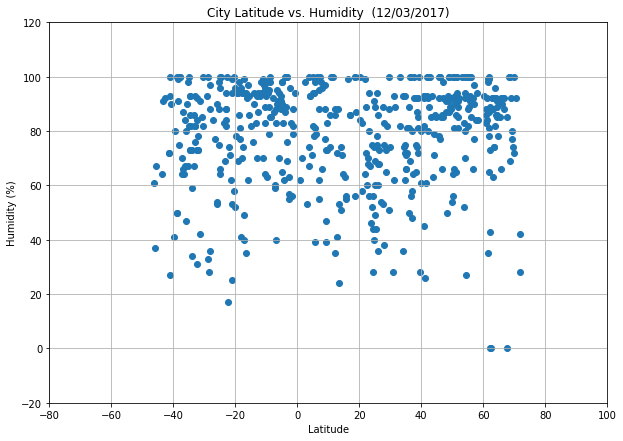

In [159]:
plt.figure(figsize=(10,7))
plt.scatter(weather_data_df['Latitude'], weather_data_df['Humidity'], marker='o')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity  ('+ date+")")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-20, 120)
# Save the figure
plt.savefig('WorldCities_Lat_Vs_Humidity.png')

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

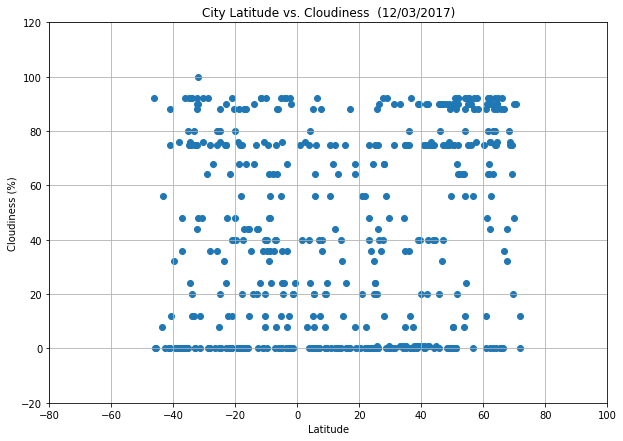

In [160]:
plt.figure(figsize=(10,7))
plt.scatter(weather_data_df['Latitude'], weather_data_df['Cloudiness'], marker='o')
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness  ('+ date+")")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-20, 120)
# Save the figure
plt.savefig('WorldCities_Lat_Vs_Cloudiness.png')

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

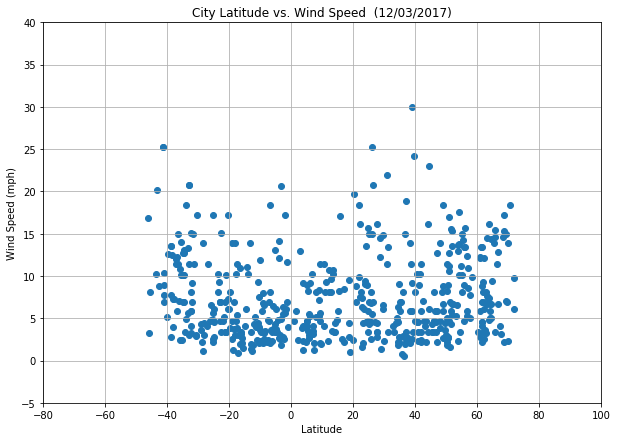

In [161]:
plt.figure(figsize=(10,7))
plt.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed'], marker='o')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed  ('+ date+")")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-5, 40)
# Save the figure
plt.savefig('WorldCities_Lat_Vs_WindSpeed.png')

# Show plot
plt.show()